In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
url = '/content/drive/MyDrive/Colab Notebooks/vgames2.csv'
drive.mount('/content/drive/')

df = pd.read_csv(url)

df = df.drop(['Unnamed: 0'], axis=1) #unnmaed 컬럼 삭제
df = df.dropna() #nan 있는 데이터 행 다 삭제.
print(df.dtypes)
df

df.isna().sum() # nan 있는 데이터 열의 갯수 합.

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object


Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [2]:
plat = df['Platform'].astype('category')
plat.value_counts()

DS      2127
PS2     2121
PS3     1299
Wii     1284
X360    1231
PSP     1193
PS      1185
PC       935
XB       799
GBA      784
GC       541
3DS      498
PSV      409
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [3]:
# 연도 바꾸기
def adjust_year(df_year):
    if df_year < 10:
        return float('200' + str(df_year))
    elif 10 <= df_year < 30:
        return float('20' + str(df_year))
    elif 30 <= df_year < 100:
        return float('19' + str(df_year))
    else:
        return float(df_year)

df['Year'] = df['Year'].apply(adjust_year).astype('int64')
#df['Year'] = df['Year'].astype('int64')

df['Year']


0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16593    2006
16594    2005
16595    2015
16596    2013
16597    1996
Name: Year, Length: 16241, dtype: int64

In [4]:
genre = df['Genre'].astype('category')
print(genre)

0           Action
1           Action
2        Adventure
3             Misc
4         Platform
           ...    
16593     Platform
16594       Action
16595       Sports
16596       Action
16597     Fighting
Name: Genre, Length: 16241, dtype: category
Categories (12, object): ['Action', 'Adventure', 'Fighting', 'Misc', ..., 'Shooter', 'Simulation',
                          'Sports', 'Strategy']


In [5]:
publi = df['Publisher'].astype('category')
print(publi)

0                          Destineer
1                 Namco Bandai Games
2                          Alchemist
3                          Zoo Games
4                        D3Publisher
                    ...             
16593                  Vivendi Games
16594              Rising Star Games
16595           Take-Two Interactive
16596                     Tecmo Koei
16597    Sony Computer Entertainment
Name: Publisher, Length: 16241, dtype: category
Categories (575, object): ['10TACLE Studios', '1C Company', '20th Century Fox Video Games', '2D Boy',
                           ..., 'imageepoch Inc.', 'inXile Entertainment', 'mixi, Inc',
                           'responDESIGN']


In [6]:
def changeUnit(sales):
    sales = sales.replace(to_replace="(\d+)$", value=r'\1M', regex=True)
    sales = sales.replace({"M": "*1E6", "K": "*1E3"}, regex=True).map(pd.eval).astype(int)
    return sales

df['JP_Sales'] = changeUnit(df['JP_Sales'])
df['EU_Sales'] = changeUnit(df['EU_Sales'])
df['NA_Sales'] = changeUnit(df['NA_Sales'])
df['Other_Sales'] = changeUnit(df['Other_Sales'])

print(df.dtypes)
print(df.isna().sum())
print(df)


Name           object
Platform       object
Year            int64
Genre          object
Publisher      object
NA_Sales        int64
EU_Sales        int64
JP_Sales        int64
Other_Sales     int64
dtype: object
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64
                                                 Name  ... Other_Sales
0                        Candace Kane's Candy Factory  ...           0
1                                      The Munchables  ...       10000
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  ...           0
3                    Deal or No Deal: Special Edition  ...           0
4           Ben 10 Ultimate Alien: Cosmic Destruction  ...       40000
...                                               ...  ...         ...
16593                         Ice Age 2: The Meltdown  ...       10000
16594                     Rainbow Islands: Revolution 

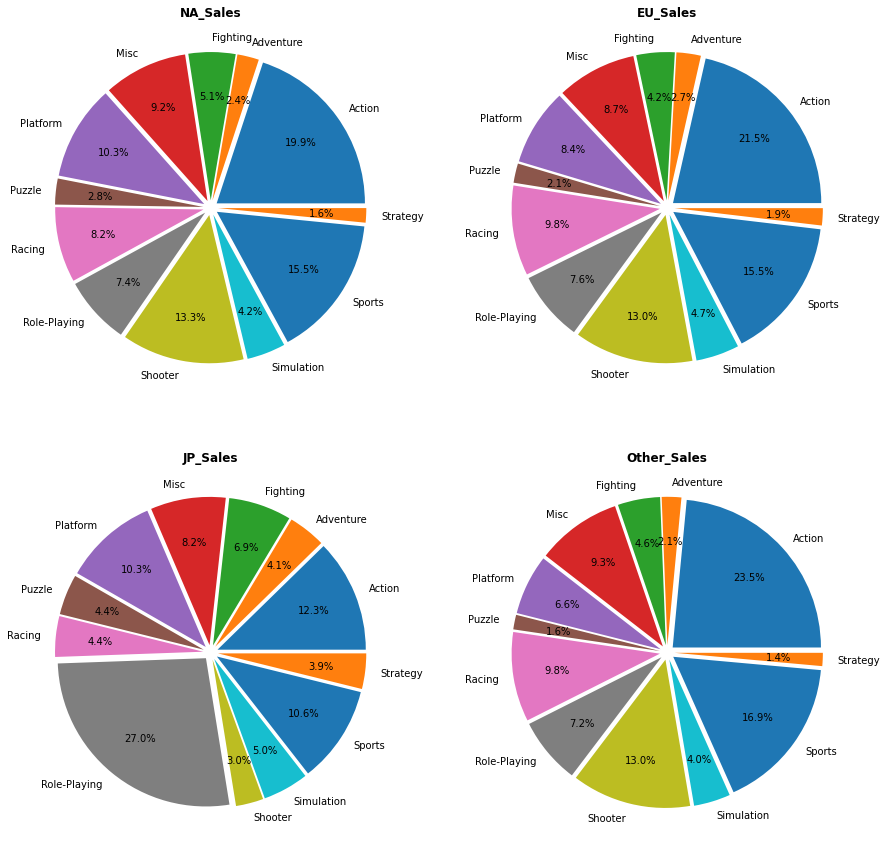

In [121]:
# Q) 지역에 따라서 선호하는 게임 장르가 다를까?
# 파이 차트

import matplotlib.pyplot as plt
local = df[{'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'}]
b = local.groupby(['Genre']).sum()

def draw_local(data):
    fig, axes = plt.subplots(2,2, figsize=(15,15))

    for i, sales in enumerate(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']):
        x = i // 2  #정수로 나누기
        y = i % 2
        ax = axes[x][y]
        ax.pie(data[sales], #데이터
               labels=b.index, #라벨
               explode=[0.05] * 12, #각 데이터 파이끼리의 거리두기.
               autopct='%1.1f%%', # 퍼센테이지
               pctdistance=0.70 # 퍼센테이지 중앙부터 얼마만큼 거리 둘지 
               )
        ax.set_title(sales,fontweight='bold') # 제목 두껍게


draw_local(b)
